## Clustering Model

In [1]:
source('../src/load_data.r')
source('../src/multiplot.r')

In [2]:
train <- read.csv('../data/train.csv')
validate <- read.csv('../data/validate.csv')

In [3]:
top_ten_df$X <- NULL
head(top_ten_df)
t(dim(top_ten_df))

train.BsmtQual.TA,train.BsmtQual.Gd,train.BsmtQual.Ex,train.TotalBsmtSF,train.BsmtFinSF1,train.BsmtQual.Fa,train.BsmtFinType1.GLQ,train.GarageType.Attchd,train.GarageType.Detchd,train.BsmtFinType1.ALQ,train.SalePrice
-0.8980076,1.1721126,-0.3001594,0.1084214,0.7205018,-0.1571639,1.5847981,0.8251512,-0.6028857,-0.422603,208500
-0.8980076,1.1721126,-0.3001594,0.1303386,0.6806608,-0.1571639,1.5847981,0.8251512,-0.6028857,-0.422603,223500
1.1128088,-0.8525724,-0.3001594,0.0706595,0.5941378,-0.1571639,-0.6305603,-1.2110638,1.6575461,2.364656,140000
-0.8980076,-0.8525724,3.3292676,0.3144655,0.7911581,-0.1571639,1.5847981,0.8251512,-0.6028857,-0.422603,307000
1.1128088,-0.8525724,-0.3001594,0.1407318,-1.4534423,-0.1571639,-0.6305603,-1.2110638,1.6575461,-0.422603,129900
1.1128088,-0.8525724,-0.3001594,0.1529360,0.7404323,-0.1571639,1.5847981,0.8251512,-0.6028857,-0.422603,118000


872,11


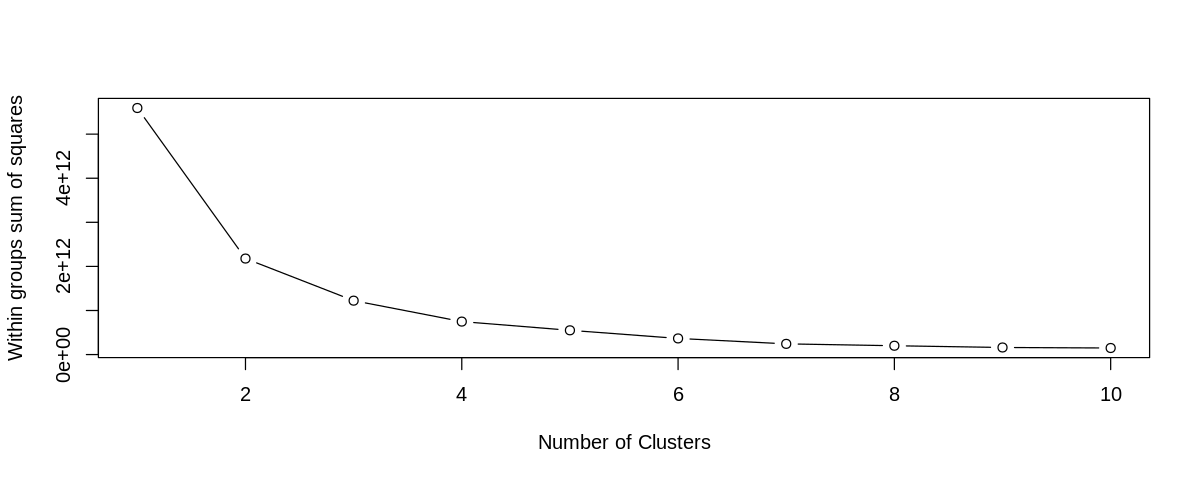

In [5]:
wss <- (nrow(top_ten_df)-1)*sum(apply(top_ten_df,2,var))
for (i in 2:10) wss[i] <- sum(kmeans(top_ten_df, 
  	centers=i)$withinss)
plot(1:10, wss, type="b", xlab="Number of Clusters",
  ylab="Within groups sum of squares")

In [6]:
fit <- kmeans(top_ten_df, 3) # 5 cluster solution
# get cluster means 
aggregate(top_ten_df,by=list(fit$cluster),FUN=mean)
# append cluster assignment
mydata <- data.frame(top_ten_df, fit$cluster)

Group.1,train.BsmtQual.TA,train.BsmtQual.Gd,train.BsmtQual.Ex,train.TotalBsmtSF,train.BsmtFinSF1,train.BsmtQual.Fa,train.BsmtFinType1.GLQ,train.GarageType.Attchd,train.GarageType.Detchd,train.BsmtFinType1.ALQ,train.SalePrice
1,-0.5222157,0.5945795,0.02113417,0.1847714,0.02155974,-0.1144388,0.3354812,0.4446127,-0.4176044,-0.05706086,218868.9
2,0.4465745,-0.3890903,-0.27100734,-0.1617205,-0.09679371,0.1699227,-0.3503041,-0.4137507,0.4365498,0.08111849,130522.2
3,-0.8105808,-0.2070206,2.01425781,0.3055715,0.30646222,-0.1571639,1.0710918,0.3234751,-0.5701258,-0.42260303,377463.8


In [14]:
install.packages('fpc')
library(fpc)

also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘class’, ‘diptest’, ‘mvtnorm’, ‘robustbase’, ‘kernlab’, ‘trimcluster’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


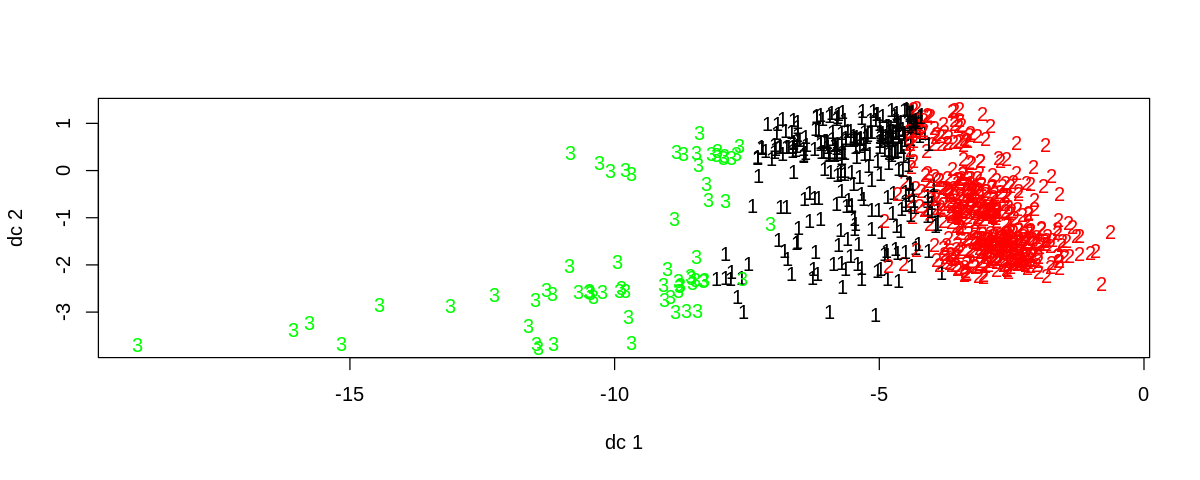

In [15]:
plotcluster(top_ten_df, fit$cluster)